In [1]:
import cv2
img1 = cv2.imread('dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

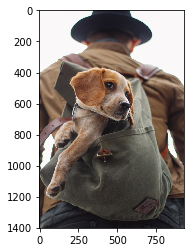

In [8]:
plt.imshow(img1)

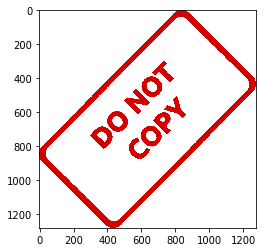

In [9]:
plt.imshow(img2)

In [10]:
img1.shape

(1401, 934, 3)

In [11]:
img2.shape

(1280, 1277, 3)

In [14]:
#We are resizing the images so that both has same size
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

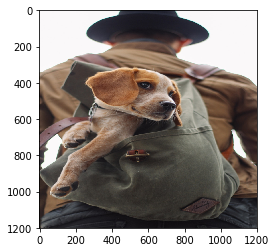

In [15]:
plt.imshow(img1)

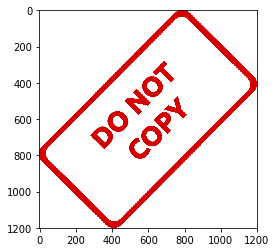

In [16]:
plt.imshow(img2)

In [21]:
#Here we are combining two images. This is done by the formula 
#mix = alpha*image1 + beta*image2 + gamma
blended = cv2.addWeighted(src1=img1, alpha=.5, src2=img2, beta=.5, gamma=0)

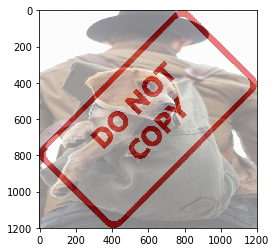

In [18]:
plt.imshow(blended)

In [19]:
blended = cv2.addWeighted(src1=img1, alpha=.8, src2=img2, beta=.1, gamma=0)

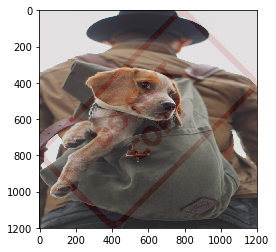

In [20]:
plt.imshow(blended)

In [5]:
#Overlay a small image over a large image
#Numphy reassignment

img1 = cv2.imread('dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

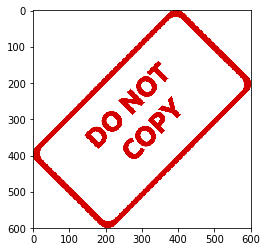

In [6]:
img2 = cv2.resize(img2,(600,600))
plt.imshow(img2)

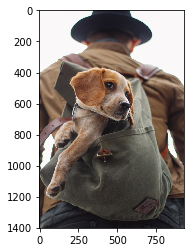

In [7]:
plt.imshow(img1)

In [8]:
#Here img1 is 1400x800 approx and img2 is 600x600
large_img = img1
small_img = img2

In [9]:
x_offset = 0
y_offset = 0

In [13]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [12]:
large_img.shape #First element is the height or y and second is the width or x

(1401, 934, 3)

In [14]:
large_img[y_offset:y_end, x_offset:x_end] = small_img

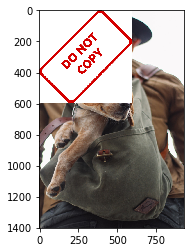

In [15]:
plt.imshow(large_img)

In [3]:
#Blend together images of different size
img1 = cv2.imread('dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [5]:
img2 = cv2.resize(img2,(600,600))

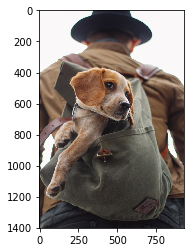

In [6]:
plt.imshow(img1)

In [7]:
img1.shape

(1401, 934, 3)

In [8]:
x_offset = 934-600
y_offset = 1401-600

In [9]:
img2.shape

(600, 600, 3)

In [10]:
rows, columns, channels = img2.shape

In [11]:
rows

600

In [12]:
columns

600

In [13]:
roi = img1[y_offset:1401, x_offset:934] #come back here

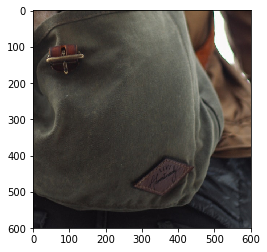

In [14]:
plt.imshow(roi)

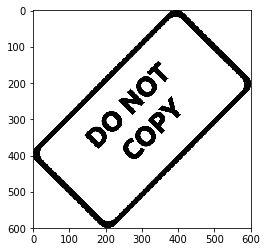

In [15]:
#Now creating the mask
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray, cmap='gray')

In [16]:
mask_inv = cv2.bitwise_not(img2gray)

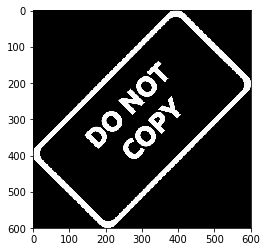

In [18]:
plt.imshow(mask_inv,cmap='gray')

In [21]:
import numpy as np
white_background = np.full(img2.shape, 255, dtype=np.uint8) #We are giving the shape of the image we want, what we want it to be filled with and its data type

In [22]:
white_background

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [23]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

In [24]:
bk.shape

(600, 600, 3)

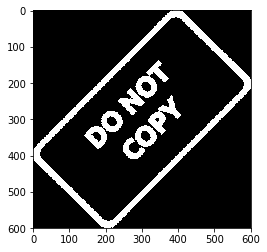

In [25]:
plt.imshow(bk)

In [28]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

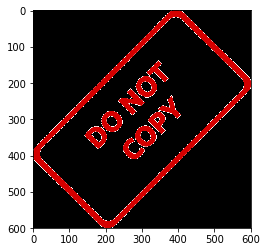

In [29]:
plt.imshow(fg)

In [30]:
final_roi = cv2.bitwise_or(roi, fg)

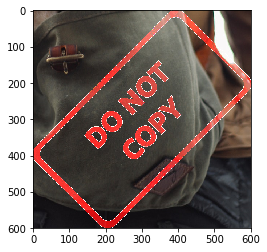

In [31]:
plt.imshow(final_roi)

In [33]:
large_img = img1
small_img = final_roi
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] =  small_img

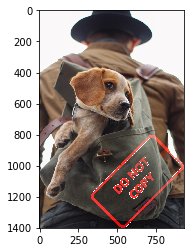

In [34]:
plt.imshow(large_img)